### Problem Description
Insurance companies take risks over customers. Risk management is a very important aspect of the insurance industry. Insurers consider every quantifiable factor to develop profiles of high and low insurance risks. Insurers collect vast amounts of information about policyholders and analyze the data.

As a Data scientist in an insurance company, you need to analyze the available data and predict whether to sanction the insurance or not.

### Dataset Description
A zipped file containing train, test and sample submission files are given. The training dataset consists of data corresponding to 52310 customers and the test dataset consists of 22421 customers. Following are the features of the dataset

Target: Claim Status (Claim)

Name of agency (Agency)

Type of travel insurance agencies (Agency.Type)

Distribution channel of travel insurance agencies (Distribution.Channel)

Name of the travel insurance products (Product.Name)

Duration of travel (Duration)

Destination of travel (Destination)

Amount of sales of travel insurance policies (Net.Sales)

The commission received for travel insurance agency (Commission)

Age of insured (Age)

The identification record of every observation (ID)

Evaluation Metric
The evaluation metric for this task will be precision_score. Read up about it more here.

### Submission Format
The user has to submit a csv file with the ID and Claim label. Sample submission file has been given to you. You can refer the sample submission file.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)

In [3]:
path = './data/train.csv'

# Load the dataframe
data = pd.read_csv(path,delimiter=',')

# Remove the Id column from the dataset
# data.drop('Id',axis=1,inplace=True)

print('Shape of the data is: ',data.shape)

data.head()

Shape of the data is:  (52310, 11)


,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


In [5]:
df_numerical=data._get_numeric_data()
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52310 entries, 0 to 52309
Data columns (total 6 columns):
ID                      52310 non-null int64
Duration                52310 non-null int64
Net Sales               52310 non-null float64
Commision (in value)    52310 non-null float64
Age                     52310 non-null int64
Claim                   52310 non-null int64
dtypes: float64(2), int64(4)
memory usage: 2.4 MB


In [6]:
data['Duration'].describe()

count    52310.000000
mean        58.256108
std        109.138708
min         -2.000000
25%         10.000000
50%         24.000000
75%         57.000000
max       4881.000000
Name: Duration, dtype: float64

In [7]:
a = data['Duration'] < 0
a.sum()

4

In [9]:
data.loc[data['Duration'] < 0, 'Duration'] = data['Duration'].mean()

In [10]:
a = data['Duration'] < 0
a.sum()

0

In [16]:
b= data['Net Sales']<data['Commision (in value)']
b.sum()

1454

In [17]:
data[b]

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
33,6138,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,4.0,THAILAND,0.000000,17.82000,30,0
62,5266,C2B,Airlines,Online,Bronze Plan,77.0,SINGAPORE,0.000000,15.00000,28,0
104,9734,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,81.0,UNITED KINGDOM,-128.700000,77.22000,63,0
120,3642,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,13.0,MALAYSIA,0.000000,11.88000,62,0
125,9233,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26.0,GERMANY,0.000000,47.52000,39,0
147,7747,EPX,Travel Agency,Online,Cancellation Plan,15.0,CANADA,-17.000000,0.00000,24,0
190,8778,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,178.0,AUSTRALIA,-69.300000,41.58000,29,0
315,4321,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26.0,AUSTRALIA,0.000000,17.82000,51,0
358,6466,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,195.0,SINGAPORE,0.000000,11.88000,31,0
390,2213,ART,Airlines,Online,24 Protect,4.0,MALAYSIA,0.000000,2.73000,48,0


In [72]:
data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age_type,Claim
0,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,Youth,0
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,Youth,0
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,Youth,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,Youth,0
4,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,Youth,0


In [73]:
#Check for Class Imbalance
def class_imbalance(target):
    class_values = (target.value_counts()/target.value_counts().sum())*100
    return class_values

class_imbalance(data['Claim'])

0    83.330147
1    16.669853
Name: Claim, dtype: float64

In [74]:
data['Claim'].value_counts()/data['Claim'].value_counts().sum()

0    0.833301
1    0.166699
Name: Claim, dtype: float64

In [75]:
le = LabelEncoder()
# Function that auto encodes any dataframe column of type category or object.
def dummyEncode(dataset):
        
        columnsToEncode = list(dataset.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                dataset[feature] = le.fit_transform(dataset[feature])
            except:
                print('Error encoding '+feature)
        return dataset
data = dummyEncode(data)


In [76]:
# Predictors
X = data.iloc[:,:-1]

# Target
y = data.iloc[:,-1]

In [79]:
# Model Selection
def run_model(predictors,target, model):
    '''
    Performs model training and tests using ROC-AUC 
    returns AUC score
    '''
    x_train,x_val,y_train,y_val = train_test_split(predictors,target,test_size=0.2,random_state=42)
    model.fit(x_train, y_train)
    y_scores = model.predict(x_val)
    auc = roc_auc_score(y_val, y_scores)

    print('Classification Report:')
    print(classification_report(y_val,y_scores))
    print('AUC Score = %.2f' %(auc*100) +' % And preciion score :',precision_score(y_val, y_scores))
    print('===='*20)

# Choosing the models. If you want to specify additional models, kindly specify them as a key-value pair as shown below.
models = {'Logistic Regression':LogisticRegression,'Decision Tree':DecisionTreeClassifier,'Random Forest': RandomForestClassifier,'XGBoost':XGBClassifier,'Gradient Boosting':GradientBoostingClassifier}

for i in models.items():
    # run model
    model = i[1]()
    print('On Model -  '+str(i[0]))
    run_model(X, y, model) # train and returns AUC test score

On Model -  Logistic Regression
Classification Report:
             precision    recall  f1-score   support

          0       0.86      0.97      0.91      8696
          1       0.60      0.21      0.31      1766

avg / total       0.81      0.84      0.81     10462

AUC Score = 58.89 % And preciion score : 0.5967213114754099
On Model -  Decision Tree
Classification Report:
             precision    recall  f1-score   support

          0       0.95      0.95      0.95      8696
          1       0.76      0.74      0.75      1766

avg / total       0.92      0.92      0.92     10462

AUC Score = 84.62 % And preciion score : 0.7631578947368421
On Model -  Random Forest
Classification Report:
             precision    recall  f1-score   support

          0       0.95      0.96      0.95      8696
          1       0.80      0.73      0.76      1766

avg / total       0.92      0.92      0.92     10462

AUC Score = 84.68 % And preciion score : 0.7960566851509551
On Model -  XGBoost
Cl

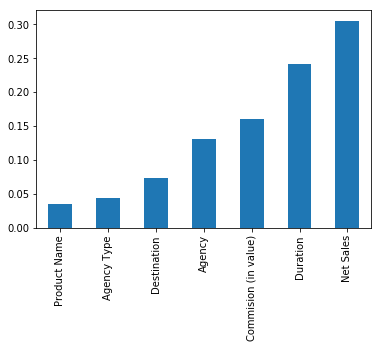

['Product Name', 'Agency Type', 'Destination', 'Agency', 'Commision (in value)', 'Duration', 'Net Sales']


In [78]:
# Feature Selection in Random Forest
def rfc_feature_selection(dataset,target):
    X_train, X_test, y_train, y_test = train_test_split(dataset, target, test_size=0.3, random_state=42, stratify=target)
    rfc = RandomForestClassifier(random_state=42)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    rfc_importances = pd.Series(rfc.feature_importances_, index=dataset.columns).sort_values().tail(7)
    rfc_importances.plot(kind='bar')
    plt.show()
    return  (rfc_importances.index).tolist()

col = rfc_feature_selection(X,y)
print(col)

In [80]:
#Grid Search for Random Forest For find out Best Parameter for Random Forest
def grid_search_random_forrest(dataframe,target):

    x_train,x_val,y_train,y_val = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)
    rfc = RandomForestClassifier()
    param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
    }
    grid_search_model = GridSearchCV(rfc, param_grid=param_grid,n_jobs=-1)
    grid_search_model.fit(x_train, y_train)
    print('Best Parameters are:')
    return grid_search_model.best_params_


grid_search_random_forrest(X,y)

Best Parameters are:


{'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2'}

In [82]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report
from sklearn.model_selection import cross_val_score
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE


def grid_search_random_forrest_best(dataframe,target):
    
    
    x_train,x_val,y_train,y_val = train_test_split(dataframe,target, test_size=0.3, random_state=42)
    
    # Applying Smote on train data for dealing with class imbalance
    smote = SMOTE(kind='regular')
    X_sm, y_sm =  smote.fit_sample(x_train, y_train)
    
    
    rfc = RandomForestClassifier(n_estimators=500, max_features='sqrt', max_depth=8, criterion='gini',random_state=42)
    rfc.fit(X_sm, y_sm)
    y_pred = rfc.predict(x_val)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
    auc = roc_auc_score(y_val, y_pred)
    print('On Validation data')
    print('AUC Score = %.2f' %(auc*100) +' % And preciion score :',precision_score(y_val, y_pred))
#     print(classification_report(y_val, y_pred))

grid_search_random_forrest_best(X,y)

On Validation data
AUC Score = 82.88 % And preciion score : 0.47751466434933737


In [47]:
# Feature Selection in Random Forest
def rfc_feature_selection(dataset,target,i):
    X_train, X_test, y_train, y_test = train_test_split(dataset, target, test_size=0.3, random_state=42, stratify=target)
    rfc = RandomForestClassifier(random_state=42)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    rfc_importances = pd.Series(rfc.feature_importances_, index=dataset.columns).sort_values().tail(i)
#     rfc_importances.plot(kind='bar')
#     plt.show()
    return  (rfc_importances.index).tolist()


for j in range(1,len(X.columns)+1):
    col = rfc_feature_selection(X,y,j)
    print(j,col)
    grid_search_random_forrest_best(X[col],y)

1 ['Net Sales']
On Validation data
ROC_AUC_SCORE is 0.7705131491345067
2 ['Duration', 'Net Sales']
On Validation data
ROC_AUC_SCORE is 0.7183154980986065
3 ['Commision (in value)', 'Duration', 'Net Sales']
On Validation data
ROC_AUC_SCORE is 0.7839018968043734
4 ['Agency', 'Commision (in value)', 'Duration', 'Net Sales']
On Validation data
ROC_AUC_SCORE is 0.8076013127300938
5 ['Destination', 'Agency', 'Commision (in value)', 'Duration', 'Net Sales']
On Validation data
ROC_AUC_SCORE is 0.8220296572434236
6 ['Agency Type', 'Destination', 'Agency', 'Commision (in value)', 'Duration', 'Net Sales']
On Validation data
ROC_AUC_SCORE is 0.8216520331032009
7 ['Product Name', 'Agency Type', 'Destination', 'Agency', 'Commision (in value)', 'Duration', 'Net Sales']
On Validation data
ROC_AUC_SCORE is 0.8268657778785101
8 ['Age_type', 'Product Name', 'Agency Type', 'Destination', 'Agency', 'Commision (in value)', 'Duration', 'Net Sales']
On Validation data
ROC_AUC_SCORE is 0.824568072908429
9 ['Di

In [48]:
score = [0.7705131491345067,0.7183154980986065,0.7839018968043734,0.8076013127300938,0.8220296572434236,0.8216520331032009,0.8268657778785101,0.824568072908429,0.8265587616234481]
max(score)

0.8268657778785101

## Therefore 7 feature are important for model

In [50]:
grid_search_random_forrest_best(X[['Product Name', 'Agency Type', 'Destination', 'Agency', 'Commision (in value)', 'Duration', 'Net Sales']],y) #7

On Validation data
ROC_AUC_SCORE is 0.8253741442324319


In [51]:
grid_search_random_forrest_best(X[['Product Name', 'Agency Type', 'Destination', 'Agency', 'Commision (in value)', 'Duration', 'Net Sales']],y) #7

On Validation data
ROC_AUC_SCORE is 0.8259052765001856


In [52]:
X = X[['Product Name', 'Agency Type', 'Destination', 'Agency', 'Commision (in value)', 'Duration', 'Net Sales']]
X.head()

,Product Name,Agency Type,Destination,Agency,Commision (in value),Duration,Net Sales
0,10,1,68,7,0.00,61,12.0
1,10,1,53,7,0.00,4,17.0
2,16,1,84,6,11.88,26,19.8
3,1,1,33,7,0.00,15,27.0
4,1,1,53,7,0.00,15,37.0


On Validation Data
AUC_ROC_SCORE is (After Ensembling)  0.8663893647461985
Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.90      0.93     13081
          1       0.63      0.83      0.71      2612

avg / total       0.91      0.89      0.90     15693

Preciion score:
0.6254315304948216
[[11779  1302]
 [  438  2174]]


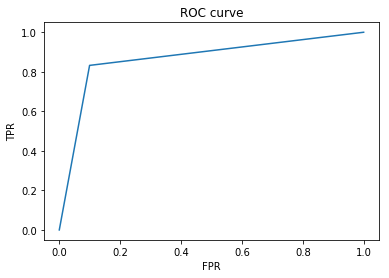

In [65]:
#Ensembling
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.ensemble import VotingClassifier


def ensemble_func2(dataframe,target):
    
    x_train,x_val,y_train,y_val = train_test_split(dataframe, target, test_size=0.3, random_state=42)

    smote = SMOTE(kind='regular')
    X_sm, y_sm =  smote.fit_sample(x_train, y_train)
    
    
    model1 = RandomForestClassifier()
    model3 = GradientBoostingClassifier()
    model2 = LogisticRegression()
    
    model = VotingClassifier(estimators=[('rf', model1), ('lr', model2), ('xgb',model3)], voting='soft')
    model.fit(X_sm,y_sm)
    y_pred = model.predict(x_val)
    model.score(x_val,y_val)

        
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
    print('On Validation Data')
    print('AUC_ROC_SCORE is (After Ensembling) ',roc_auc_score(y_val, y_pred))
    print('Classification Report:')
    print(classification_report(y_val, y_pred))
    print('Preciion score:')
    print(precision_score(y_val, y_pred))
    print(confusion_matrix(y_val, y_pred))
    
    plt.clf()
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    
ensemble_func2(X,y)

On Validation Data
AUC_ROC_SCORE is (After Ensembling)  0.8216629059858277
Classification Report:
             precision    recall  f1-score   support

          0       0.95      0.86      0.91     13081
          1       0.54      0.78      0.63      2612

avg / total       0.88      0.85      0.86     15693

Preciion score:
0.5351408265332982
[[11315  1766]
 [  579  2033]]


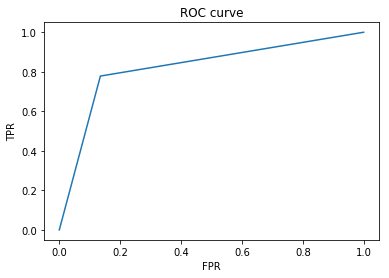

In [67]:
#Ensembling



def ensemble_func2(dataframe,target):
    
    x_train,x_val,y_train,y_val = train_test_split(dataframe, target, test_size=0.3, random_state=42)

    smote = SMOTE(kind='regular')
    X_sm, y_sm =  smote.fit_sample(x_train, y_train)
    
    
    model1 = RandomForestClassifier()
    model3 = GradientBoostingClassifier()
    model2 = LogisticRegression()
    
    model = VotingClassifier(estimators=[('rf', model1), ('lr', model2), ('xgb',model3)], voting='hard')
    model.fit(X_sm,y_sm)
    y_pred = model.predict(x_val)
    model.score(x_val,y_val)

        
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
    print('On Validation Data')
    print('AUC_ROC_SCORE is (After Ensembling) ',roc_auc_score(y_val, y_pred))
    print('Classification Report:')
    print(classification_report(y_val, y_pred))
    print('Preciion score:')
    print(precision_score(y_val,y_pred))
    print(confusion_matrix(y_val, y_pred))
    
    plt.clf()
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    
ensemble_func2(X,y)

In [58]:
# Actual Test File
test = pd.read_csv('./data/test.csv')

# Storing the Id column
Id = test[['ID']]

# Preprocessed Test File
test = pd.read_csv('./data/sample_submission.csv')
# test.drop('ID',1,inplace=True)
test.head()

,ID,Claim
0,17631,1
1,15064,1
2,14139,1
3,19754,1
4,16439,1


In [59]:
def grid_search_log_reg(dataframe,target):


    x_train,x_val,y_train,y_val = train_test_split(dataframe, target, test_size=0.3, random_state=42)

    smote = SMOTE(kind='regular')
    X_sm, y_sm =  smote.fit_sample(x_train, y_train)


    log_reg = LogisticRegression()

    param_grid = { 
        'C' : np.logspace(-5, 8, 15)
    }
    grid_search = GridSearchCV(log_reg, param_grid=param_grid)

    grid_search.fit(X_sm, y_sm)
    
    # Predict on the preprocessed test file
    y_pred = grid_search.predict(test)
    return y_pred

y_pred = grid_search_log_reg(X,y)


ValueError: X has 2 features per sample; expecting 7

In [57]:
prediction = pd.DataFrame(y_pred, columns=['y'])
submission = pd.concat([Id,prediction['y']],1)

submission.to_csv('../data/submission.csv',index=False)

NameError: name 'y_pred' is not defined